## Unzip file

In [7]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
zip_path = 'heart+disease.zip'
extract_path = 'heart_disease'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extracted files:")
for file in os.listdir(extract_path):
    print(file)


Extracted files:
processed.cleveland.data
costs
new.data
long-beach-va.data
ask-detrano
heart-disease.names
reprocessed.hungarian.data
switzerland.data
cleveland.data
Index
hungarian.data
bak
processed.switzerland.data
processed.hungarian.data
processed.va.data
WARNING
cleve.mod


## Step 1
## Data Preprocessing

In [8]:
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'rectecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
file_path = 'heart_disease/processed.cleveland.data'

df = pd.read_csv(file_path, header=None, names=col_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,rectecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   rectecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [10]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
rectecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dtypes, df.isnull().sum()

(age         float64
 sex         float64
 cp          float64
 trestbps    float64
 chol        float64
 fbs         float64
 rectecg     float64
 thalach     float64
 exang       float64
 oldpeak     float64
 slope       float64
 ca          float64
 thal        float64
 target        int64
 dtype: object,
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 rectecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          4
 thal        2
 target      0
 dtype: int64)

In [13]:
df_clean = df.dropna()
df_clean.isnull().sum()

df.shape, df_clean.shape

((303, 14), (297, 14))

In [14]:
df_encoded = pd.get_dummies(df_clean, columns=['cp', 'rectecg', 'slope', 'thal'])
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_4.0,rectecg_0.0,rectecg_1.0,rectecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,False,False,False,True,True,False,False,True,False,False


In [15]:
from sklearn.preprocessing import StandardScaler
features = df_encoded.drop('target', axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,rectecg_0.0,rectecg_1.0,rectecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,0.691095,0.750380,-0.276443,2.430427,0.017494,-0.696419,1.068965,-0.721976,3.451528,...,-0.957146,-0.989949,-0.116841,1.016979,-0.937948,-0.925338,3.625308,-1.110443,3.937004,-0.794901
1,1.378929,0.691095,1.596266,0.744555,-0.411450,-1.816334,1.435916,0.381773,2.478425,-0.289727,...,1.044772,-0.989949,-0.116841,1.016979,-0.937948,1.080686,-0.275839,0.900542,-0.254000,-0.794901
2,1.378929,0.691095,-0.659431,-0.353500,-0.411450,-0.899420,1.435916,1.326662,1.411625,-0.289727,...,1.044772,-0.989949,-0.116841,1.016979,-0.937948,1.080686,-0.275839,-1.110443,-0.254000,1.258018
3,-1.941680,0.691095,-0.095506,0.051047,-0.411450,1.633010,-0.696419,2.099753,-0.721976,-0.289727,...,-0.957146,1.010153,-0.116841,-0.983304,-0.937948,-0.925338,3.625308,0.900542,-0.254000,-0.794901
4,-1.498933,-1.446980,-0.095506,-0.835103,-0.411450,0.978071,-0.696419,0.295874,-0.721976,-0.289727,...,-0.957146,-0.989949,-0.116841,1.016979,1.066157,-0.925338,-0.275839,0.900542,-0.254000,-0.794901


## Step 2
## Exploratory Data Analysis (EDA)

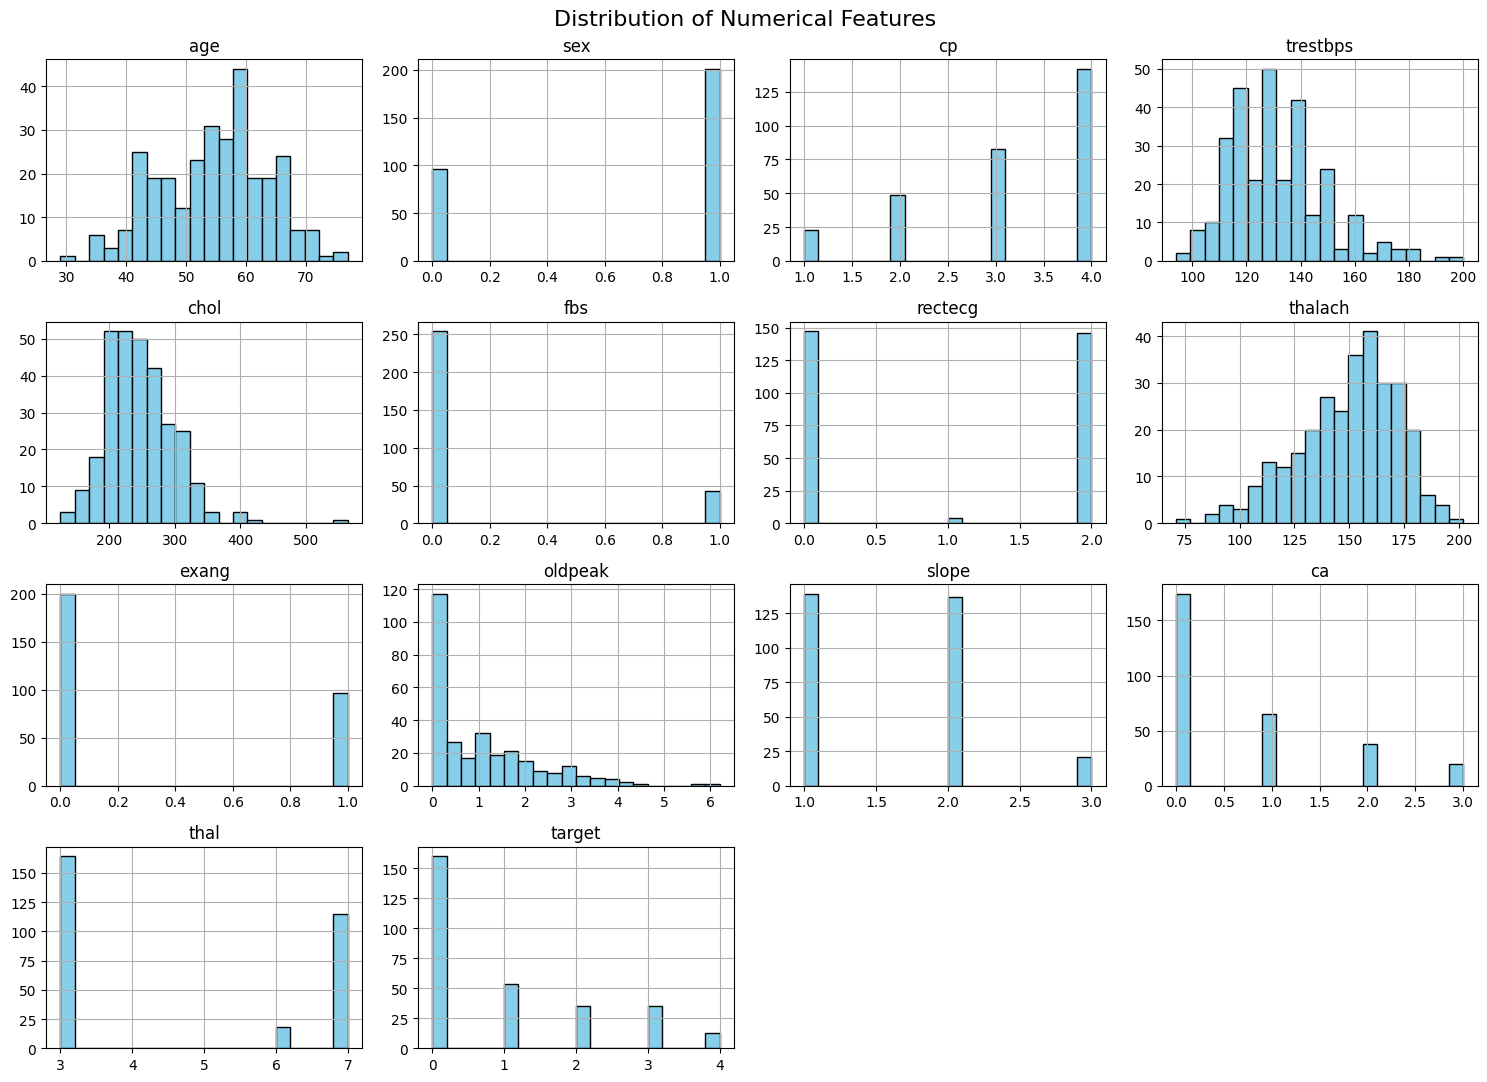

In [16]:
df_clean.hist(figsize=(15,11), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

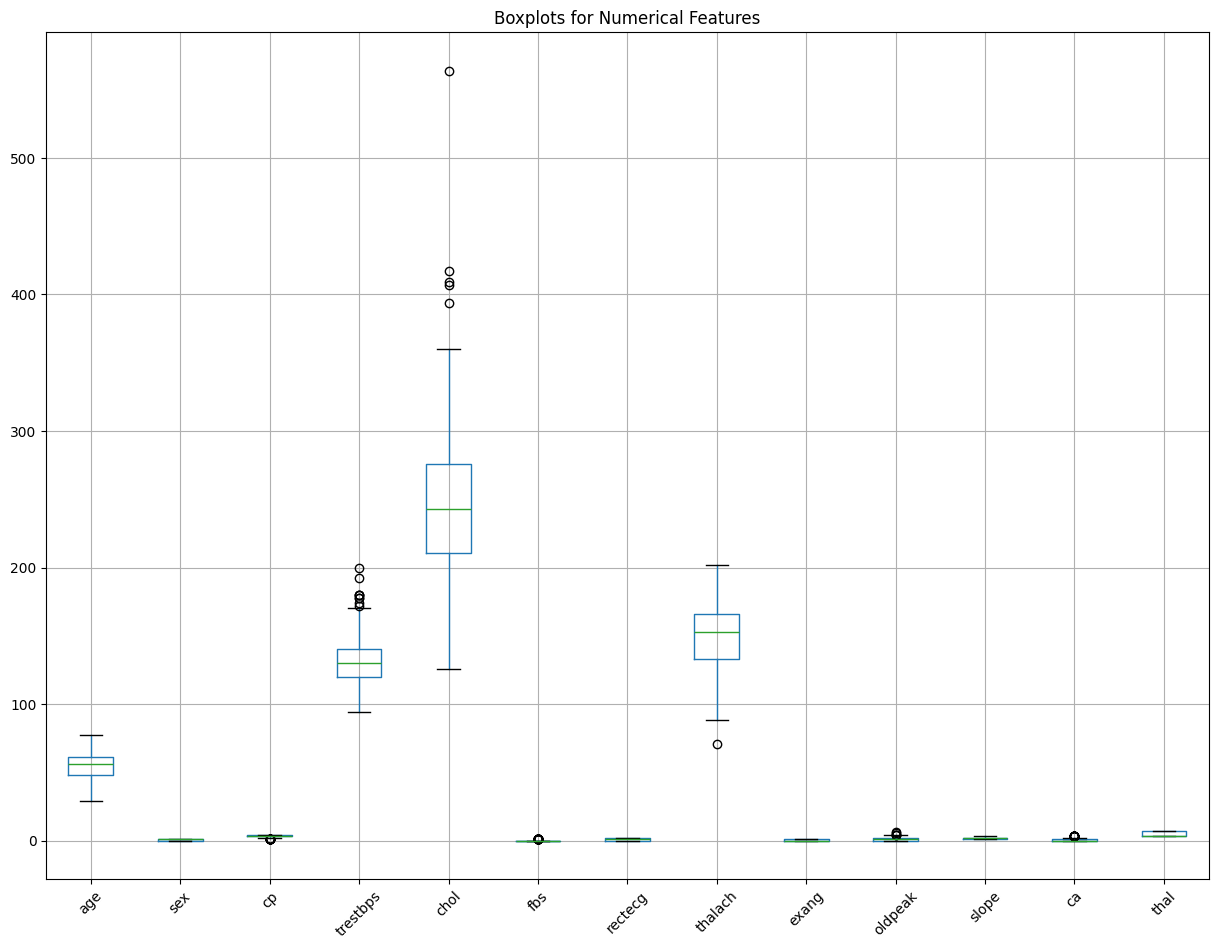

In [17]:
plt.figure(figsize=(15,11))
df_clean.drop('target', axis=1).boxplot(rot=90, grid=True)
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=45)
plt.show()

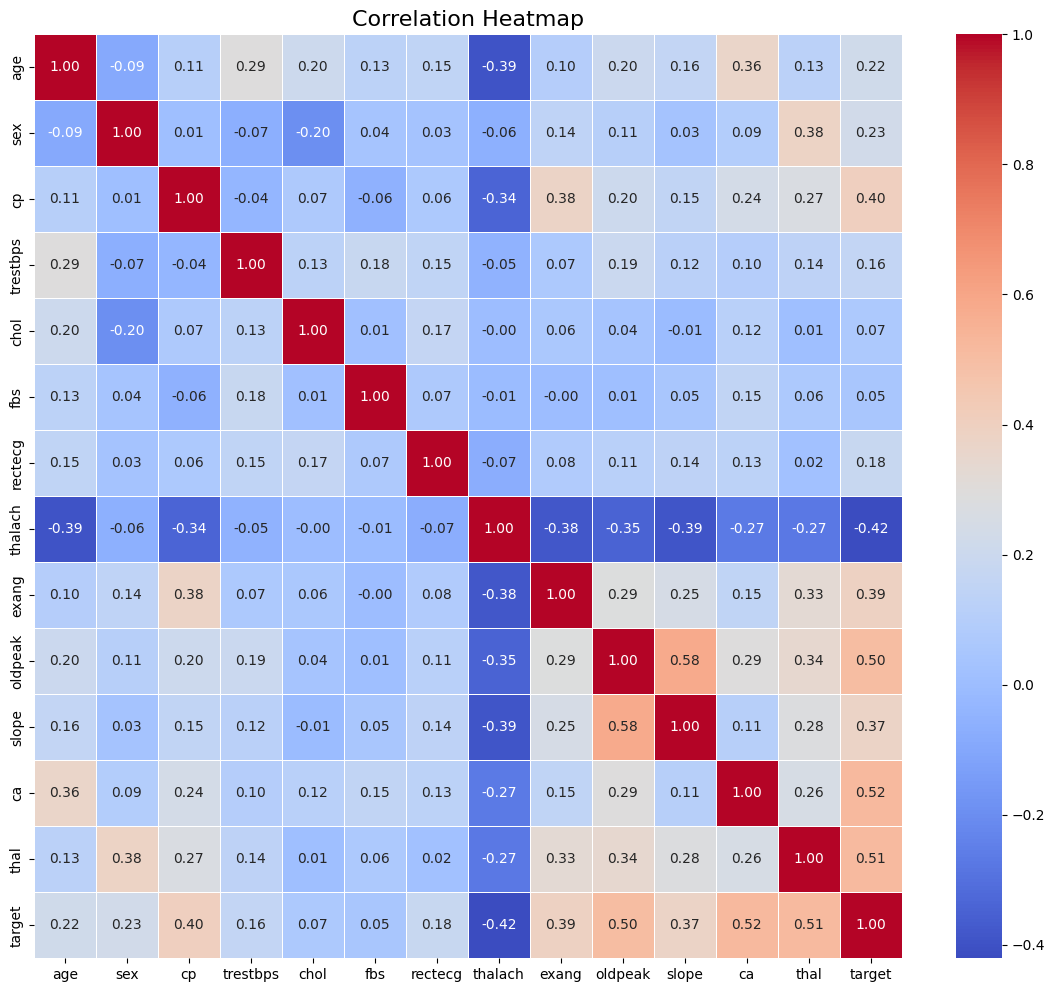

In [18]:
corr = df_clean.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

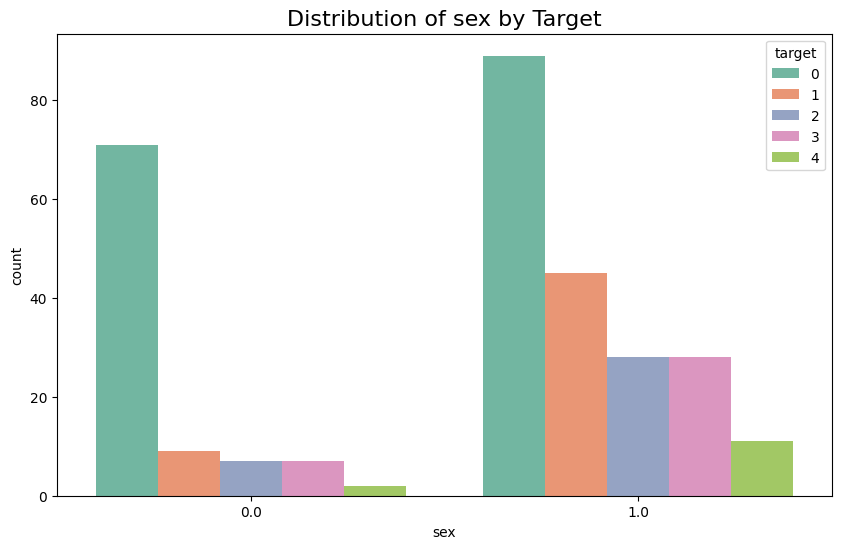

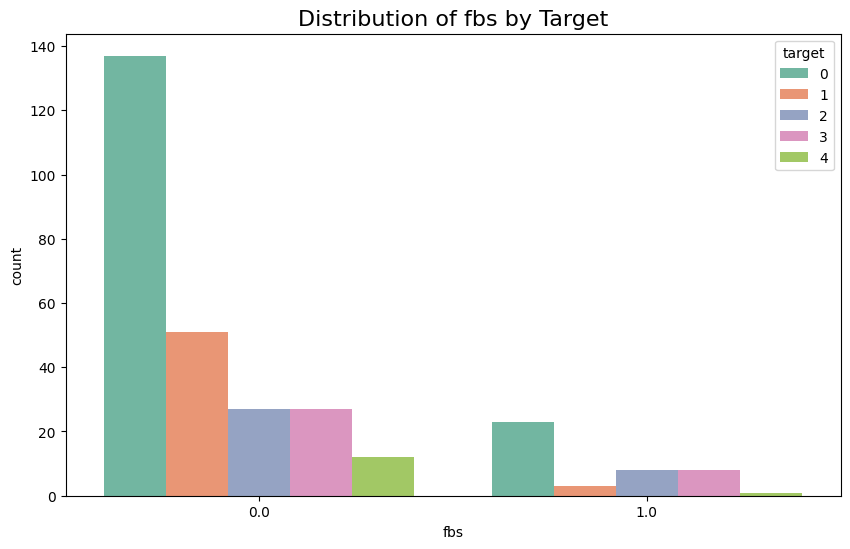

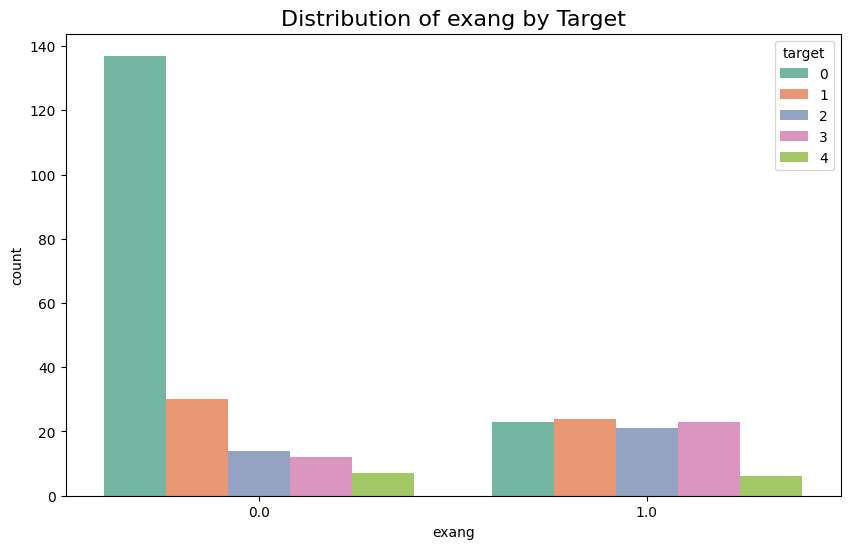

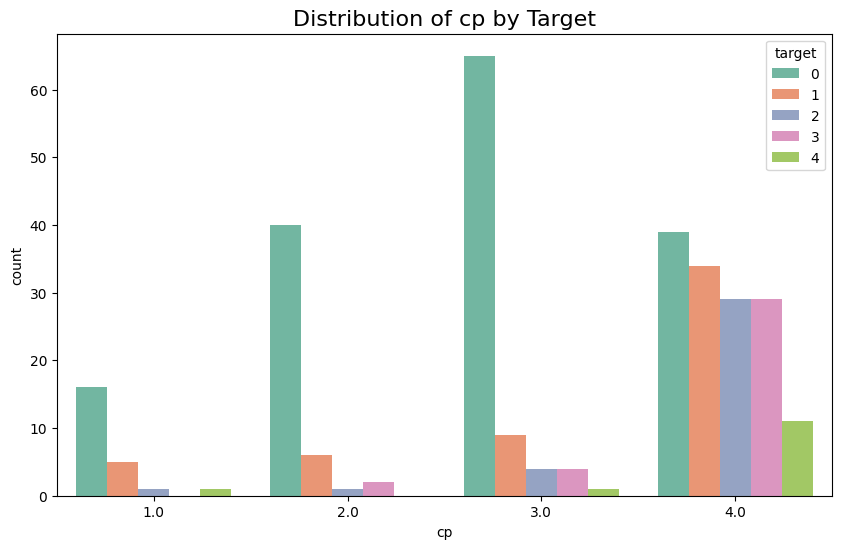

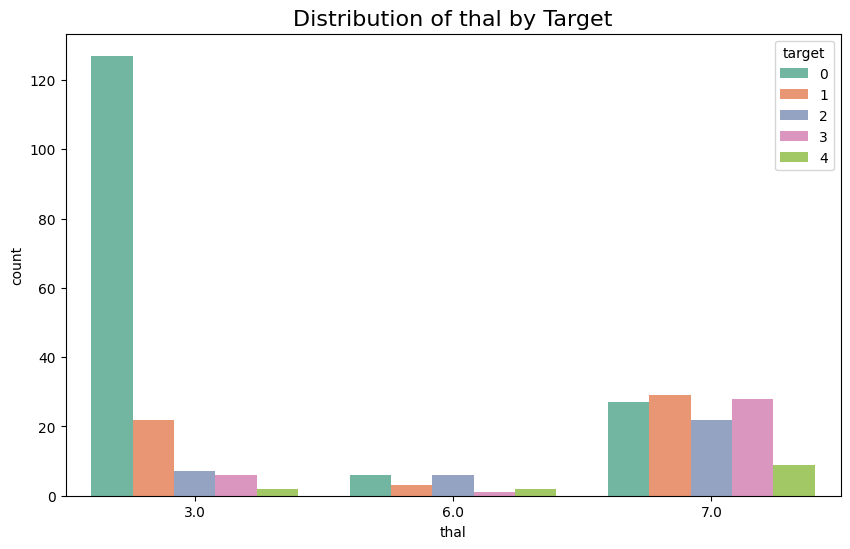

In [19]:
categorical = ['sex', 'fbs', 'exang', 'cp', 'thal']

for col in categorical:
  plt.figure(figsize=(10, 6))
  sns.countplot(data=df_clean, x=col, hue='target', palette='Set2')
  plt.title(f'Distribution of {col} by Target', fontsize=16)
  plt.show()

## Step 3
## Determine Optimal Number of Cluster

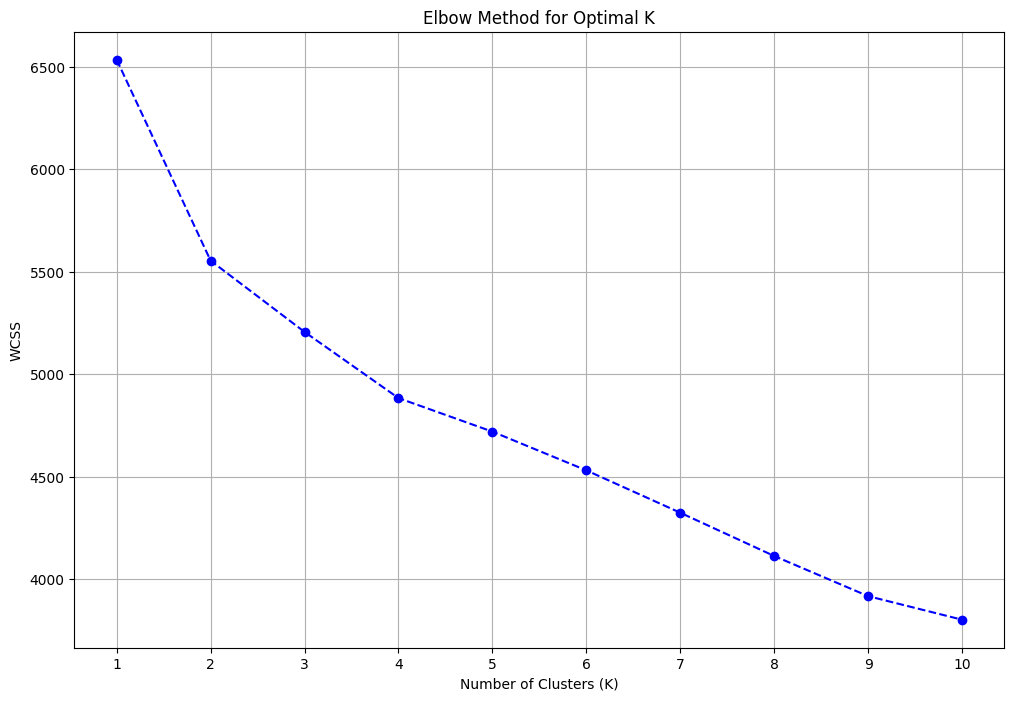

In [20]:
from sklearn.cluster import KMeans

X = df_scaled.copy()

wcss = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Step 4
## Apply K-Means Clustering

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)
df_scaled['cluster'] = cluster_labels
df_scaled.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,rectecg_0.0,rectecg_1.0,rectecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0,cluster
0,0.936181,0.691095,0.750380,-0.276443,2.430427,0.017494,-0.696419,1.068965,-0.721976,3.451528,...,-0.989949,-0.116841,1.016979,-0.937948,-0.925338,3.625308,-1.110443,3.937004,-0.794901,0
1,1.378929,0.691095,1.596266,0.744555,-0.411450,-1.816334,1.435916,0.381773,2.478425,-0.289727,...,-0.989949,-0.116841,1.016979,-0.937948,1.080686,-0.275839,0.900542,-0.254000,-0.794901,1
2,1.378929,0.691095,-0.659431,-0.353500,-0.411450,-0.899420,1.435916,1.326662,1.411625,-0.289727,...,-0.989949,-0.116841,1.016979,-0.937948,1.080686,-0.275839,-1.110443,-0.254000,1.258018,1
3,-1.941680,0.691095,-0.095506,0.051047,-0.411450,1.633010,-0.696419,2.099753,-0.721976,-0.289727,...,1.010153,-0.116841,-0.983304,-0.937948,-0.925338,3.625308,0.900542,-0.254000,-0.794901,2
4,-1.498933,-1.446980,-0.095506,-0.835103,-0.411450,0.978071,-0.696419,0.295874,-0.721976,-0.289727,...,-0.989949,-0.116841,1.016979,1.066157,-0.925338,-0.275839,0.900542,-0.254000,-0.794901,2


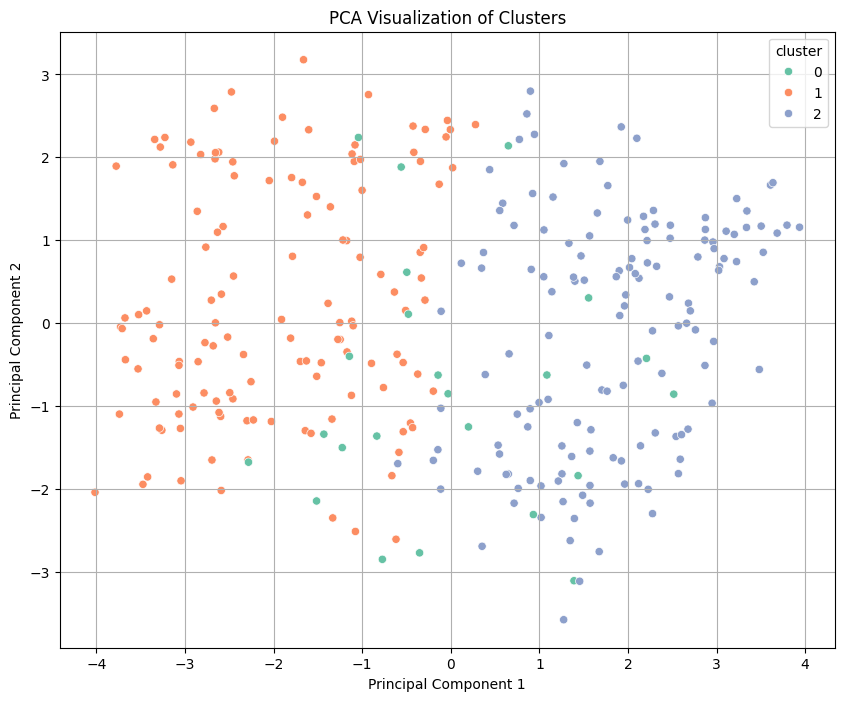

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled.drop('cluster', axis=1))

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_scaled['cluster'], palette='Set2')
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Step 5
## Interpretation and Analysis

In [23]:
df_clean['cluster'] = df_scaled['cluster']

cluster_summary = df_clean.groupby('cluster').mean()

cluster_summary.round(2)

<ipython-input-23-8b7f20537ca8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = df_scaled['cluster']


,age,sex,cp,trestbps,chol,fbs,rectecg,thalach,exang,oldpeak,slope,ca,thal,target
cluster,,,,,,,,,,,,,,
0.0,56.74,0.74,2.52,133.57,246.70,0.22,1.13,146.87,0.39,1.48,1.57,0.61,4.48,0.65
1.0,55.73,0.71,3.36,130.02,245.66,0.15,1.05,145.25,0.40,1.16,1.66,0.82,5.23,1.27
2.0,53.03,0.64,3.09,132.94,250.21,0.13,0.95,154.44,0.25,0.89,1.55,0.55,4.26,0.68


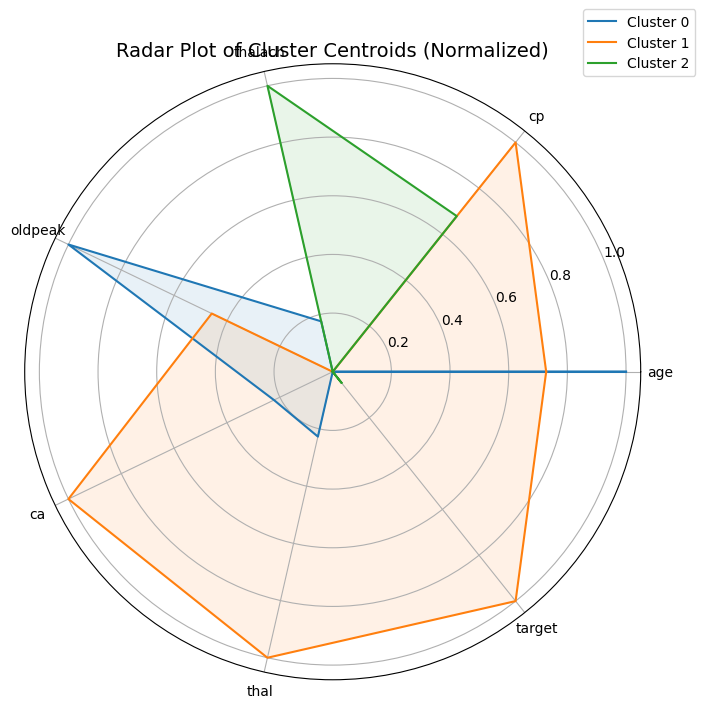

In [25]:
cluster_summary = pd.DataFrame({
    'age': [56.74, 55.73, 53.03],
    'cp': [2.52, 3.36, 3.09],
    'thalach': [146.87, 145.25, 154.44],
    'oldpeak': [1.48, 1.16, 0.89],
    'ca': [0.61, 0.82, 0.55],
    'thal': [4.48, 5.23, 4.26],
    'target': [0.65, 1.27, 0.68]
}, index=[0, 1, 2])

top_features = ['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal', 'target']

normalized_data = (cluster_summary[top_features] - cluster_summary[top_features].min()) / \
                  (cluster_summary[top_features].max() - cluster_summary[top_features].min())

num_vars = len(top_features)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in normalized_data.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_features)

plt.title("Radar Plot of Cluster Centroids (Normalized)", fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.grid(True)
plt.show()

## Step 6
## Summary Report


## Heart Disease Clustering Report Summary
# Objective
To uncover hidden patterns and risk groups among patients in the Heart Disease (Cleveland) dataset using K-Means Clustering, without using the actual labels (unsupervised learning).

# Methodology
Data Preprocessing

Loaded and assigned column names to raw .data file.

Handled missing values represented as '?' by converting to NaN and dropping affected rows.

One-hot encoded categorical variables (cp, slope, restecg, thal).

Standardized numerical features using StandardScaler for clustering.

Exploratory Data Analysis (EDA)

Histograms & boxplots revealed skewed features and outliers in chol, trestbps, oldpeak.

Correlation heatmap showed that features like cp, thalach, and oldpeak are strongly related to heart disease.

Count plots showed the relationship between features like sex, fbs, and cp with target.

Optimal Clusters (Elbow Method)

Elbow plot showed that k=3 is the optimal number of clusters based on WCSS.

K-Means Clustering

K-Means was applied with k=3.

PCA was used to reduce feature space to 2D for visualization.

Clusters were visually well-separated and interpretable.

Cluster Analysis

Used .groupby('cluster').mean() to analyze the characteristics of each cluster.

Built a radar plot to visualize normalized centroids of each cluster for clinical insight.

- Medical Insights from Clustering
- Cluster 0 – Moderate Risk
Mid-range oldpeak, mild chest pain, mid cholesterol

Intermediate target values (≈ 0.65)

Represents a moderate-risk patient group

+ Cluster 1 – High Risk
Mostly asymptomatic (cp high), abnormal thal

High oldpeak, more vessels blocked (ca)

Highest average target (≈ 1.27)

Represents patients at greatest risk, potential candidates for immediate clinical intervention

+ Cluster 2 – Low Risk
Youngest patients with best thalach (heart rate) and lowest ST depression

Lowest target values (≈ 0.68)

Represents the healthiest cluster

+++ Benefits of This Clustering Approach
-  Helps stratify patients into risk categories
-  Provides clinicians with unbiased grouping for further testing
-  Can be used to prioritize resources for high-risk patients
-  No labels were used → applicable in real-world unsupervised diagnosis

+++ Visual Assets Created
Histogram & Boxplots of features

Correlation Heatmap

Elbow Method Curve

PCA Scatterplot of clusters

Radar plot of cluster centroids

